**SUPERCOMPUTAÇÃO - AVALIAÇÃO FINAL - 13/06/2022**

**NOME:**

**QUESTÃO 1.** Resolva a questão 1 no espaço de código abaixo... você pode duplicá-lo quantas vezes forem necessárias. 

In [1]:
import os
import pandas as pd
import time
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D
import random
import itertools as it

In [2]:
class Test():
    def __init__(self, input_size, num_threads, time):
        self.input_size = input_size
        self.num_threads = num_threads
        self.time = time
    def __repr__(self):
        return f"{self.input_size=}, {self.num_threads=}, {self.time=}"
    def __str__(self):
        return f"{self.input_size=}, {self.num_threads=}, {self.time=}"

test_list = []
thread_list = [2,3,5,7,9]

try:
    with open('Q1_Mean_Stddev/cache.pickle', 'rb') as f:
        test_list = pickle.load(f)
except Exception:
    for thr, siz in it.product(thread_list, range(500,1000001,500)):
        sl = []
        # Repeat twice to get average
        for _ in range(2):
            start=time.perf_counter()
            subprocess.run(['./Q1_Mean_Stddev/main'], input="{0}\n{1}".format(siz,thr), text=True)
            end=time.perf_counter()
            sl.append((end-start)*1000)

        test_list.append(Test(siz, thr, np.mean(sl)))
    with open('Q1_Mean_Stddev/cache.pickle', 'wb') as f:
            pickle.dump(test_list, f)


In [3]:
reorganized_list = list(map(lambda x: x.__dict__ , test_list))
congregated = {}
for k in list(reorganized_list[0]):
    congregated[k] = []
for d in reorganized_list:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
df.head(3)

,input_size,num_threads,time
0,776500,3,322.205660
1,781000,3,100.872221
2,793500,3,99.868531


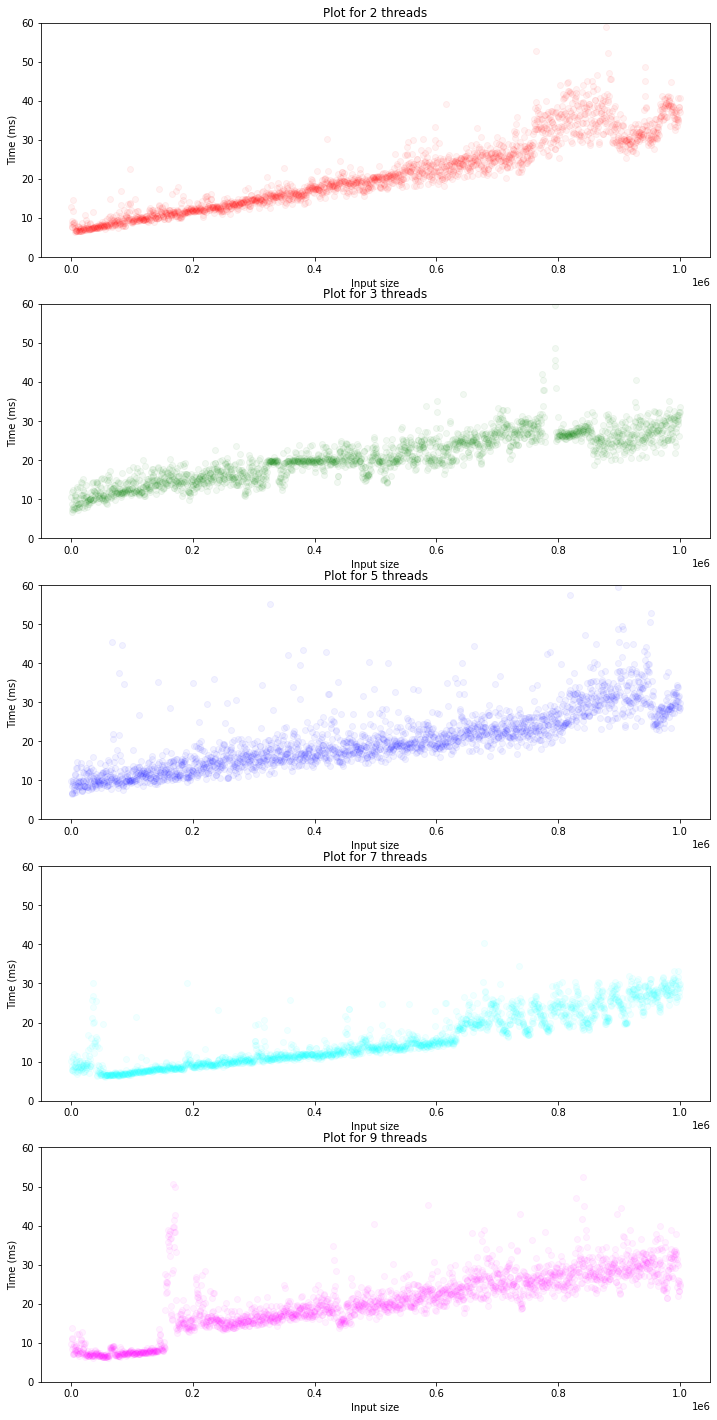

In [4]:
fig = plt.figure(figsize=(12,25))
ax_list = []
c = ['r', 'g', 'b',  'cyan', 'magenta']
# ax_list.append(fig.add_subplot(1,1,1))
for i in range(len(thread_list)):
    df_nt = df[df['num_threads'] == thread_list[i]].sort_values('time', ascending=False)
    ax_list.append(fig.add_subplot(5, 1, i+1))
    ax_list[i].scatter(df_nt['input_size'], df_nt['time'], c=c[i], alpha=0.05)
    ax_list[i].set_xlabel("Input size")
    ax_list[i].set_ylabel("Time (ms)")
    ax_list[i].set_title(f"Plot for {thread_list[i]} threads")
    ax_list[i].set_ylim((0,60))
fig.show()

Acima, pode-se observar os tempos das execuções para os números diferentes de threads. Não é possível observar uma variação muito grande entre as amostras coletadas. Isso provavelmente se dá por conta da máquina em utilização ter um número baixo(4) de cores, então 9 tarefas e 3 tarefas acabam por ocupar uma quantidade semelhante da CPU, já que os cores vão equilibrar as mudanças de contexto para processar todas as threads quando o número de threads pedido for maior que disponível.

**FEEDBACK QUESTÃO 1**: Não preencher este campo. Ele será preenchido pelo seu professor durante a correção. 

**QUESTÃO 2.** Resolva a questão 2 no espaço de código abaixo... você pode duplicá-lo quantas vezes forem necessárias. 

In [5]:
#espaço para codificação
test_list = []
try:
    with open('Q2_Saxpy/cache.pickle', 'rb') as f:
        test_list = pickle.load(f)
except Exception:
    for siz in range(500,100001,500):
        sl = []
        # Repeat twice to get average
        for _ in range(2):
            start=time.perf_counter()
            subprocess.run(['./Q2_Saxpy/main_cpu'], input="{0}\n{1}".format(siz,np.random.randint(5,10)), text=True)
            end=time.perf_counter()
            sl.append((end-start)*1000)
        test_list.append(Test(siz, 8, np.mean(sl)))

        sl = []
        # Repeat twice to get average
        for _ in range(2):
            start=time.perf_counter()
            subprocess.run(['./Q2_Saxpy/main_gpu'], input="{0}\n{1}".format(siz,np.random.randint(5,10)), text=True)
            end=time.perf_counter()
            sl.append((end-start)*1000)
        test_list.append(Test(siz, 6000, np.mean(sl)))

    with open('Q2_Saxpy/cache.pickle', 'wb') as f:
            pickle.dump(test_list, f)

In [6]:
reorganized_list = list(map(lambda x: x.__dict__ , test_list))
congregated = {}
for k in list(reorganized_list[0]):
    congregated[k] = []
for d in reorganized_list:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
df.head(3)

,input_size,num_threads,time
0,3000,6000,663.897903
1,58500,6000,661.205921
2,5000,6000,636.615132


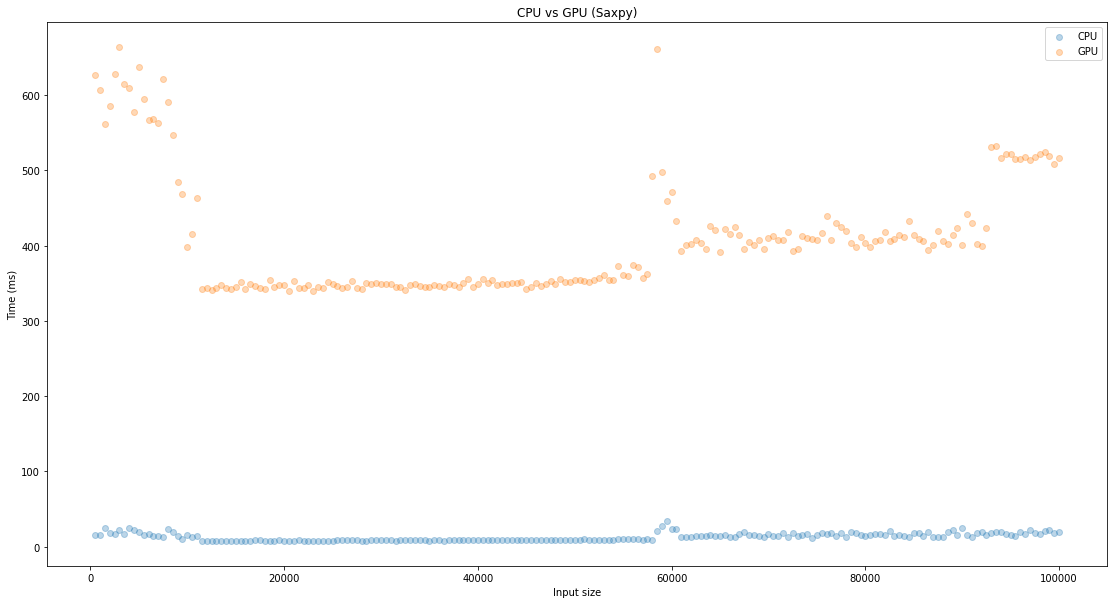

In [12]:
fig = plt.figure(figsize=(19,10))

df_nt = df[df['num_threads'] == 8].sort_values('time', ascending=False)
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(df_nt['input_size'], df_nt['time'], alpha=0.3, label="CPU")

df_nt = df[df['num_threads'] == 6000].sort_values('time', ascending=False)
ax1.scatter(df_nt['input_size'], df_nt['time'], alpha=0.3, label="GPU")

ax1.set_xlabel("Input size")
ax1.set_ylabel("Time (ms)")
ax1.set_title(f"CPU vs GPU (Saxpy)")
ax1.legend()
fig.show()

Como é possível observar no gráfico acima, o processamento do Saxpy na GPU é cerca de 7x mais lento que na CPU com OpenMP. Isso se deve, muito provavelmente a ineficiências no uso da GPU, e também ao gargalo de comunicação entre a CPU e a GPU. O algoritmo da GPU tem o potencial de superar o da CPU, para quantidades gigantescas de dados, porém mesmo assim, existe o limite de memória da GPU (que é dado pela memória interna da placa), enquanto a CPU é limitada pela memória do sistema, que é maior (na maiora dos casos).

**FEEDBACK QUESTÃO 2**: Não preencher este campo. Ele será preenchido pelo seu professor durante a correção. 

**QUESTÃO 3.** Resolva a questão 3 no espaço de código abaixo... você pode duplicá-lo quantas vezes forem necessárias. 

Para a questão 3, foi utilizada uma implementação minha realizada em aula, que aplica a estratégia de Monte Carlo para o cálculo de PI na GPU.

O algoritmo implementado tem alguns problemas, principalmente o uso da geração de números aleatórios na GPU, que não é muito uniforme, devido a problemas de concorrência. Ele atinge uma estimativa não ótima, mas bem razoável.

Para executá-lo, basta chamar 

    $ ./Q3_MCarloPI_GPU/main {seed}

Onde {seed} é substituído por um número inteiro qualquer.

**FEEDBACK QUESTÃO 3**: Não preencher este campo. Ele será preenchido pelo seu professor durante a correção. 

**QUESTÃO 4.** Resolva a questão 4 no espaço de código abaixo... você pode duplicá-lo quantas vezes forem necessárias. 

In [8]:
#espaço para codificação

**FEEDBACK QUESTÃO 4:** Não preencher este campo. Ele será preenchido pelo seu professor durante a correção.